___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1><p style="text-align: center;">Data Analysis with Python <br>Project - 1</p><h1> - Traffic Police Stops <img src="https://docs.google.com/uc?id=17CPCwi3_VvzcS87TOsh4_U8eExOhL6Ki" class="img-fluid" alt="CLRSWY" width="200" height="100"> 

In this chapter, you will use a **second dataset** to explore the impact of **weather conditions** on police behavior during traffic stops. You will practice **merging** and **reshaping** datasets, assessing whether a data source is trustworthy, working with **categorical** data, and other advanced skills.

## Plotting the temperature

**INSTRUCTIONS**

*   Read ``weather.csv`` into a ``DataFrame`` named ``weather``.
*   Select the temperature columns (``TMIN``, ``TAVG``, ``TMAX``) and print their ``summary statistics`` using the ``.describe()`` method.
*   Create a **box plot** to visualize the temperature columns.
*   Display the plot.

In [1]:
#Read weather.csv
import pandas as pd
weather=pd.read_csv('weather.csv', nrows=50000)

In [2]:
#Select the min, max, avg temperature columns
weather[['TMIN', 'TAVG', 'TMAX']].describe().T

,count,mean,std,min,25%,50%,75%,max
TMIN,7996.0,42.099425,17.386667,-10.0,29.0,42.0,57.0,77.0
TAVG,1217.0,52.493016,17.829792,6.0,39.0,54.0,68.0,86.0
TMAX,8005.0,61.247096,18.495043,13.0,46.0,62.0,77.0,102.0


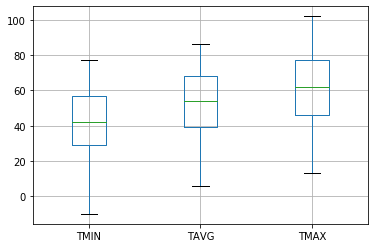

In [3]:
#Create a box plot to visualize the temperature columns
#Display the plot
boxplot = weather.boxplot(column=['TMIN', 'TAVG', 'TMAX'])

***

## Plotting the temperature difference

**INSTRUCTIONS**

*   Create a new column in the ``weather`` ``DataFrame`` named ``TDIFF`` that represents the difference between the maximum and minimum temperatures.
*   Print the summary statistics for ``TDIFF`` using the ``.describe()`` method.
*   Create a histogram with ``20 bins`` to visualize ``TDIFF``.
*   Display the plot.

In [4]:
#Create a new column named TDIFF which represents the difference between the maximum and minimum temperatures.
weather['TDIFF']=weather['TMAX']-weather['TMIN']

In [5]:
#Print the summary statistics for TDIFF
print(weather['TDIFF'].describe())

count    7994.000000
mean       19.149237
std         7.009716
min       -25.000000
25%        14.000000
50%        19.000000
75%        24.000000
max        48.000000
Name: TDIFF, dtype: float64


(array([1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 9.700e+01, 3.250e+02, 7.400e+02, 1.261e+03, 1.244e+03,
        1.789e+03, 1.354e+03, 6.380e+02, 3.840e+02, 1.220e+02, 2.700e+01,
        1.000e+01, 2.000e+00]),
 array([-25.  , -21.35, -17.7 , -14.05, -10.4 ,  -6.75,  -3.1 ,   0.55,
          4.2 ,   7.85,  11.5 ,  15.15,  18.8 ,  22.45,  26.1 ,  29.75,
         33.4 ,  37.05,  40.7 ,  44.35,  48.  ]),
 <a list of 20 Patch objects>)

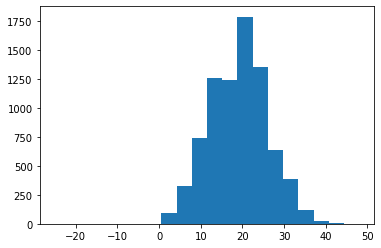

In [25]:
#Create a histogram with 20 bins to visualize TDIFF.
#Display the plot
import matplotlib.pyplot as plt
plt.hist(weather['TDIFF'], bins=20)

***

## Counting bad weather conditions

The ``weather`` ``DataFrame`` contains ``20`` columns that start with ``'WT'``, each of which represents a bad weather condition. For example:

*   ``WT05`` indicates ``"Hail"``
*   ``WT11`` indicates ``"High or damaging winds"``
*   ``WT17`` indicates ``"Freezing rain"``

For every row in the dataset, each ``WT`` column contains either a ``1`` (meaning the condition was present that day) or ``NaN`` (meaning the condition was not present).

In this exercise, you'll quantify ``"how bad"`` the weather was each day by counting the number of ``1`` values in each row.

**INSTRUCTIONS**

*   Copy the columns ``WT01`` through ``WT22`` from ``weather`` to a new ``DataFrame`` named ``WT``.
*   Calculate the sum of each row in ``WT``, and store the results in a new weather column named ``bad_conditions``.
*   Replace any ``missing values`` in ``bad_conditions`` with a ``0``. (This has been done for you.)
*   Create a **histogram** to visualize ``bad_conditions``, and then display the plot.

In [7]:
#Copy the columns WT01 through WT22 from weather to a new DataFrame named WT
WT= weather.loc[:,'WT01':'WT22']
WT.shape

(8022, 20)

In [8]:
# Summing up all columns to a new bad_conditions column
WT['bad_conditions'] = WT.sum(axis=1)
weather['bad_conditions']=WT['bad_conditions'].astype(int)

In [9]:
weather['bad_conditions'].value_counts()

0    5738
1     628
4     476
3     380
2     368
5     282
6     101
7      41
9       4
8       4
Name: bad_conditions, dtype: int64

(array([5.738e+03, 6.280e+02, 3.680e+02, 3.800e+02, 4.760e+02, 2.820e+02,
        1.010e+02, 4.100e+01, 4.000e+00, 4.000e+00]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <a list of 10 Patch objects>)

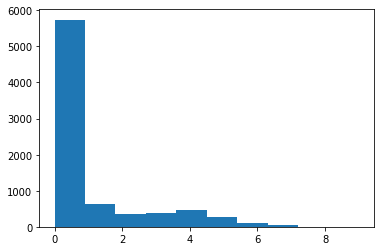

In [10]:
#Create a histogram to visualize bad_conditions
plt.hist(weather['bad_conditions'], bins=10)

(array([628., 368., 380., 476., 282., 101.,  41.,   8.]),
 array([1., 2., 3., 4., 5., 6., 7., 8., 9.]),
 <a list of 8 Patch objects>)

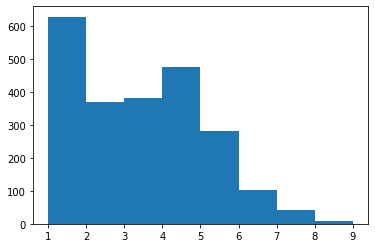

In [26]:
#histogram for WT['bad_conditions']>0 in order to focus on the bad weather
WT2=weather[weather['bad_conditions']>0]
plt.hist(WT2['bad_conditions'], bins=8)

***

## Rating the weather conditions

In the previous exercise, you counted the number of bad weather conditions each day. In this exercise, you'll use the counts to create a *rating system** for the weather.

The counts range from ``0`` to ``9``, and should be converted to ratings as follows:

*   Convert ``0`` to ``'good'``
*   Convert ``1`` through ``4`` to ``'bad'``
*   Convert ``5`` through ``9`` to ``'worse'``

**INSTRUCTIONS**

*   Count the **unique** values in the ``bad_conditions`` column and sort the ``index``. 
*   Create a ``dictionary`` called ``mapping`` that maps the ``bad_conditions`` integers to strings as specified above.
*   Convert the ``bad_conditions`` integers to strings using the ``mapping`` and store the results in a new column called ``rating``.
*   Count the **unique** values in ``rating`` to verify that the integers were properly converted to strings.

In [12]:
#Count the unique values in the bad_conditions column 
sorted(weather['bad_conditions'].unique())

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [13]:
#Create a dictionary called mapping that maps the bad_conditions integers to strings
mapping={0:'good', 1:'bad', 2:'bad', 3:'bad', 4:'bad', 5:'worse', 6:'worse', 7:'worse', 8:'worse', 9:'worse' }

In [14]:
#Convert the bad_conditions integers to strings
weather['rating']=weather['bad_conditions'].map(mapping)

In [15]:
#Count the unique values in rating
weather['rating'].value_counts()

good     5738
bad      1852
worse     432
Name: rating, dtype: int64

***

## Changing the data type to category

Since the ``rating`` column only has a few possible values, you'll change its data type to ``category`` in order to store the data more efficiently. You'll also specify a logical order for the categories, which will be useful for future exercises.

**INSTRUCTIONS**

*   Create a ``list`` object called ``cats`` that lists the weather ratings in a logical order: ``'good'``, ``'bad'``, ``'worse'``.
*   Change the data type of the ``rating`` column from ``object`` to ``category``. Make sure to use the ``cats list`` to define the category ordering.
*   Examine the ``head`` of the ``rating`` column to confirm that the categories are logically ordered.

In [16]:
#Create a list object called cats that lists the weather ratings in a logical order: 'good', 'bad', 'worse'
cats=['good', 'bad', 'worse']

In [17]:
#Change the data type of the rating column from object to category
weather['rating']=weather['rating'].astype('category')
weather['rating']=weather['rating'].cat.set_categories(['good', 'bad', 'worse'], ordered=True)

In [18]:
weather['rating'].dtype

CategoricalDtype(categories=['good', 'bad', 'worse'], ordered=True)

In [19]:
weather['rating'].head()

0    good
1    good
2    good
3    good
4    good
Name: rating, dtype: category
Categories (3, object): [good < bad < worse]

In [20]:
weather.head()

,STATION,DATE,AWND,TAVG,TMAX,TMIN,WT01,WT02,WT03,WT04,...,WT15,WT16,WT17,WT18,WT19,WT21,WT22,TDIFF,bad_conditions,rating
0,USC00379423,2005-01-01,NaN,NaN,47.0,28.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.0,0,good
1,USC00379423,2005-01-02,NaN,NaN,52.0,24.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.0,0,good
2,USC00379423,2005-01-03,NaN,NaN,48.0,27.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.0,0,good
3,USC00379423,2005-01-04,NaN,NaN,54.0,40.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.0,0,good
4,USC00379423,2005-01-05,NaN,NaN,44.0,31.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.0,0,good


In [21]:
weather['DATE'].value_counts()

2015-12-11    3
2011-12-07    3
2011-06-28    3
2012-01-06    3
2015-12-12    3
             ..
2007-06-03    1
2012-04-25    1
2012-06-16    1
2009-10-25    1
2015-11-07    1
Name: DATE, Length: 4017, dtype: int64

In [22]:
weather['STATION'].value_counts()

USW00014765    4017
USC00379423    3991
USC00371874       8
USC00371875       6
Name: STATION, dtype: int64

***

## Preparing the DataFrames

In this exercise, you'll prepare the **traffic stop** and **weather rating** ``DataFrames`` so that they're ready to be merged:

With the ``ri`` ``DataFrame``, you'll move the ``stop_datetime`` index to a ``column`` since the index will be lost during the merge.

With the ``weather`` ``DataFrame``, you'll select the ``DATE`` and ``rating`` columns and put them in a new ``DataFrame``.

**INSTRUCTIONS**

* Reset the ``index`` of the ``ri`` ``DataFrame``.

* Examine the ``head`` of ``ri`` to verify that ``stop_datetime`` is now a ``DataFrame`` column, 
and the ``index`` is now the default ``integer`` index.

* Create a new ``DataFrame`` named ``weather_rating`` that contains only the ``DATE`` and ``rating`` columns from the ``weather`` ``DataFrame``.

* Examine the ``head`` of ``weather_rating`` to verify that it contains the proper columns.

> Before starting your work from this part of this chapter **repeat the steps which you did in the first chapter for preparing the ``ri`` data.** Continue to this chapter based on where you were in the end of the first chapter.

In [27]:
#Reset the index of the ri DataFrame
import pandas as pd
ri=pd.read_csv('Police.csv', nrows=50000)
ri.drop(['county_fips', 'fine_grained_location', 'county_name', 'state'], axis=1, inplace=True)
ri.dropna(subset=['driver_gender'],inplace=True)
ri['is_arrested']=ri['is_arrested'].astype(bool)
ri['combined']= ri['stop_date']+' ' +ri['stop_time']
ri['stop_datetime']=ri['combined'].astype('datetime64')
ri.drop('combined', axis=1, inplace=True)
ri.dtypes

C:\Users\aslik\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


id                            object
stop_date                     object
stop_time                     object
location_raw                  object
police_department             object
driver_gender                 object
driver_age_raw               float64
driver_age                   float64
driver_race_raw               object
driver_race                   object
violation_raw                 object
violation                     object
search_conducted                bool
search_type_raw               object
search_type                   object
contraband_found                bool
stop_outcome                  object
is_arrested                     bool
stop_duration                 object
out_of_state                  object
drugs_related_stop              bool
district                      object
stop_datetime         datetime64[ns]
dtype: object

In [28]:
#Examine the head of ri
ri.head()

,id,stop_date,stop_time,location_raw,police_department,driver_gender,driver_age_raw,driver_age,driver_race_raw,driver_race,...,search_type_raw,search_type,contraband_found,stop_outcome,is_arrested,stop_duration,out_of_state,drugs_related_stop,district,stop_datetime
0,RI-2005-00001,2005-01-02,01:55,Zone K1,600,M,1985.0,20.0,W,White,...,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone K1,2005-01-02 01:55:00
1,RI-2005-00002,2005-01-02,20:30,Zone X4,500,M,1987.0,18.0,W,White,...,NaN,NaN,False,Citation,False,16-30 Min,False,False,Zone X4,2005-01-02 20:30:00
3,RI-2005-00004,2005-01-04,12:55,Zone X4,500,M,1986.0,19.0,W,White,...,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone X4,2005-01-04 12:55:00
4,RI-2005-00005,2005-01-06,01:30,Zone X4,500,M,1978.0,27.0,B,Black,...,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone X4,2005-01-06 01:30:00
5,RI-2005-00006,2005-01-12,08:05,Zone X1,0,M,1973.0,32.0,B,Black,...,NaN,NaN,False,Citation,False,30+ Min,True,False,Zone X1,2005-01-12 08:05:00


In [29]:
#Create weather_rating DataFrame (contains only the DATE and rating columns from the weather DataFrame)
weather_rating= weather[['DATE', 'rating']]

In [30]:
#Examine the head of weather_rating
weather_rating.head()

,DATE,rating
0,2005-01-01,good
1,2005-01-02,good
2,2005-01-03,good
3,2005-01-04,good
4,2005-01-05,good


***

## Merging the DataFrames

Merging the DataFrames
In this exercise, you'll ``merge`` the ``ri`` and ``weather_rating`` ``DataFrames`` into a new ``DataFrame``, ``ri_weather``.

The ``DataFrames`` will be joined using the ``stop_date`` column from ``ri`` and the ``DATE`` column from ``weather_rating``. Thankfully the date formatting matches exactly, which is not always the case!

Once the merge is complete, you'll set ``stop_datetime`` as the index, which is the column you saved in the previous exercise.

Examine the shape of the ``ri`` ``DataFrame``.
``Merge`` the ``ri`` and ``weather_rating`` ``DataFrames`` using a ``left join``.
Examine the ``shape`` of ``ri_weather`` to confirm that it has two more columns but the same number of rows as ``ri``.
Replace the ``index`` of ``ri_weather`` with the ``stop_datetime`` column.

In [31]:
ri.shape

(48010, 23)

In [32]:
# merge the ri and weather_rating using a left join
ri_weather=pd.merge(left=ri, right=weather_rating, right_on='DATE', left_on='stop_date', how='left')
ri_weather.shape

(95877, 25)

In [33]:
#Set stop_datetime as index of 'ri_weather'
ri_weather.set_index('stop_datetime', inplace=True)

In [34]:
ri_weather.head()

,id,stop_date,stop_time,location_raw,police_department,driver_gender,driver_age_raw,driver_age,driver_race_raw,driver_race,...,search_type,contraband_found,stop_outcome,is_arrested,stop_duration,out_of_state,drugs_related_stop,district,DATE,rating
stop_datetime,,,,,,,,,,,,,,,,,,,,,
2005-01-02 01:55:00,RI-2005-00001,2005-01-02,01:55,Zone K1,600,M,1985.0,20.0,W,White,...,NaN,False,Citation,False,0-15 Min,False,False,Zone K1,2005-01-02,good
2005-01-02 01:55:00,RI-2005-00001,2005-01-02,01:55,Zone K1,600,M,1985.0,20.0,W,White,...,NaN,False,Citation,False,0-15 Min,False,False,Zone K1,2005-01-02,bad
2005-01-02 20:30:00,RI-2005-00002,2005-01-02,20:30,Zone X4,500,M,1987.0,18.0,W,White,...,NaN,False,Citation,False,16-30 Min,False,False,Zone X4,2005-01-02,good
2005-01-02 20:30:00,RI-2005-00002,2005-01-02,20:30,Zone X4,500,M,1987.0,18.0,W,White,...,NaN,False,Citation,False,16-30 Min,False,False,Zone X4,2005-01-02,bad
2005-01-04 12:55:00,RI-2005-00004,2005-01-04,12:55,Zone X4,500,M,1986.0,19.0,W,White,...,NaN,False,Citation,False,0-15 Min,False,False,Zone X4,2005-01-04,good


***

## Comparing arrest rates by weather rating

Do police officers arrest drivers more often when the weather is bad? Find out below!

- **First**, you'll calculate the **overall arrest rate**.

- **Then**, you'll calculate the **arrest rate** for each of the **weather ratings** you previously assigned.

- **Finally**, you'll add **violation type** as a second factor in the analysis, to see if that accounts for any differences in the arrest rate.

Since you previously defined a logical order for the weather categories, ``good < bad < worse``, they will be sorted that way in the results.

In [35]:
#calculate the overall arrest rate
ri_weather['is_arrested'].value_counts(normalize=True)

False    0.948184
True     0.051816
Name: is_arrested, dtype: float64

In [36]:
#calculate the arrest rate for each of the weather ratings
ri_weather.groupby('rating')[['is_arrested']].mean()

,is_arrested
rating,
good,0.051263
bad,0.051462
worse,0.062559


In [37]:
# add violation type in the analysis, to see if that accounts for any differences in the arrest rate.
ri_weather.groupby(['rating','violation'])[['is_arrested']].mean()

is_arrested
rating violation                       
good   Equipment               0.121123
       Moving violation        0.114006
       Other                   0.275689
       Registration/plates     0.196108
       Speeding                0.023061
bad    Equipment               0.125000
       Moving violation        0.116299
       Other                   0.283368
       Registration/plates     0.214286
       Speeding                0.021220
worse  Equipment               0.150943
       Moving violation        0.133835
       Other                   0.270833
       Registration/plates     0.166667
       Speeding                0.026168

***

## Selecting From a mult-indexed Series

The output of a single ``.groupby()`` operation on multiple columns is a ``Series`` with a ``MultiIndex``. Working with this type of object is similar to working with a ``DataFrame``:

The ``outer`` index level is like the ``DataFrame`` rows.
The ``inner`` index level is like the ``DataFrame`` columns.
In this exercise, you'll practice accessing data from a multi-indexed ``Series`` using the ``.loc[]`` accessor.

**INSTRUCTIONS**

- Save the output of the ``.groupby()`` operation from the last exercise as a new object, ``arrest_rate``.
- Print the ``arrest_rate`` ``Series`` and examine it.
- Print the arrest rate for ``moving violations`` in bad weather.
- Print the arrest rates for ``speeding violations`` in all three weather conditions.

In [38]:
#Save the output of the .groupby() operation from the last exercise
arrest_rate=ri_weather.groupby(['rating','violation'])['is_arrested'].mean()

In [39]:
#Print the arrest_rate Series
print(arrest_rate)

rating  violation          
good    Equipment              0.121123
        Moving violation       0.114006
        Other                  0.275689
        Registration/plates    0.196108
        Speeding               0.023061
bad     Equipment              0.125000
        Moving violation       0.116299
        Other                  0.283368
        Registration/plates    0.214286
        Speeding               0.021220
worse   Equipment              0.150943
        Moving violation       0.133835
        Other                  0.270833
        Registration/plates    0.166667
        Speeding               0.026168
Name: is_arrested, dtype: float64


In [40]:
#Print the arrest rate for moving violations in bad weather
print(arrest_rate.loc['bad','Moving violation'])

0.11629857422421024


In [41]:
#Print the arrest rates for speeding violations in all three weather conditions.
print(arrest_rate.xs('Speeding', level='violation'))

rating
good     0.023061
bad      0.021220
worse    0.026168
Name: is_arrested, dtype: float64


***

## Reshaping the arrest rate data

In this exercise, you'll start by **reshaping** the ``arrest_rate`` ``Series`` into a ``DataFrame``. This is a useful step when working with any multi-indexed ``Series``, since it enables you to access the full range of ``DataFrame`` methods.

Then, you'll create the exact same ``DataFrame`` using a ``pivot table``. This is a great example of how pandas often gives you more than one way to reach the same result!

**INSTRUCTIONS**

- ``unstack`` the ``arrest_rate`` ``Series`` to ``reshape`` it into a ``DataFrame``.
- Create the exact same ``DataFrame`` using a ``pivot table``! Each of the three ``.pivot_table()`` parameters should be specified as one of the ``ri_weather`` columns.

In [42]:
type(arrest_rate)

pandas.core.series.Series

In [43]:
#unstack the arrest_rate Series to reshape it into a DataFrame
arrest_rate=arrest_rate.unstack()

In [44]:
arrest_rate

violation,Equipment,Moving violation,Other,Registration/plates,Speeding
rating,,,,,
good,0.121123,0.114006,0.275689,0.196108,0.023061
bad,0.125000,0.116299,0.283368,0.214286,0.021220
worse,0.150943,0.133835,0.270833,0.166667,0.026168


In [52]:
#Create the exact same DataFrame using a pivot table
ri_weather.pivot_table('is_arrested', index='rating', columns='violation')

violation,Equipment,Moving violation,Other,Registration/plates,Speeding
rating,,,,,
good,0.121123,0.114006,0.275689,0.196108,0.023061
bad,0.125000,0.116299,0.283368,0.214286,0.021220
worse,0.150943,0.133835,0.270833,0.166667,0.026168
